In [1]:
import numpy as np
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

import pandas as pd

import json
import glob
import os

In [2]:
base_path = os.environ['TDCCH_EXP_OUTPUT_DIR']
paths = glob.glob(base_path + "/rank_queries_all_graphs/*.json")
data = [json.load(open(path)) for path in paths]

In [3]:
query_running_times = pd.DataFrame.from_records([{ 
    'graph': run['args'][1],
    **algo } 
    for run in data for algo in run["algo_runs"] if algo['algo'] == "Floating TDCCH Query"])

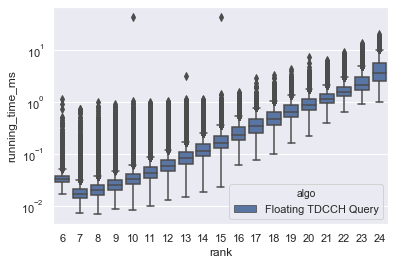

In [19]:
g = sns.boxplot(data=query_running_times.loc[lambda x: x['graph'] == "/algoDaten/graphs/cleaned_td_road_data/ptv17-eur-car/day/di/"], x='rank', y='running_time_ms', hue='algo')
g.set_yscale('log')

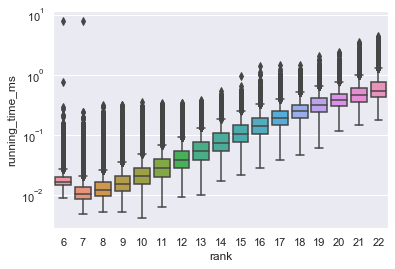

In [13]:
g = sns.boxplot(data=query_running_times.loc[lambda x: x['graph'] == "/algoDaten/graphs/cleaned_td_road_data/de/day/dido/"], x='rank', y='running_time_ms')
g.set_yscale('log')

In [18]:
query_running_times.loc[lambda x: x['running_time_ms'] > 1].loc[lambda x: x['rank'] == 6].loc[lambda x: x['graph'] == "/algoDaten/graphs/cleaned_td_road_data/de/day/dido/"]

,algo,departure_time,earliest_arrival,from,graph,num_nodes_on_shortest_path,rank,running_time_ms,to,unpacking_running_time_ms
1375535,Floating TDCCH Query,79088.58,79188.18,3109847,/algoDaten/graphs/cleaned_td_road_data/de/day/...,10.0,6,7.882223,3201814,0.002391
